In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.model_selection import train_test_split
from time import strptime,time,mktime

In [2]:
from seaborn import heatmap,pairplot

In [3]:
colors=['red','green','blue','yellow','violet','#00ffff','#ff00bf','#937f3c','#937f91','#630ff0']

In [4]:
df1=pd.read_csv("../resources/Excel_sheets/Car_sales.csv")
df1.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

## DATA CLEANING

In [6]:
df1.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [7]:
df1.Latest_Launch.unique()

array(['2/2/2012', '6/3/2011', '1/4/2012', '3/10/2011', '10/8/2011',
       '8/9/2011', '2/27/2012', '6/28/2011', '1/29/2012', '4/4/2011',
       '11/2/2011', '9/3/2011', '3/23/2012', '7/23/2011', '2/23/2012',
       '4/29/2011', '11/27/2011', '9/28/2011', '4/17/2012', '8/17/2011',
       '3/19/2012', '5/24/2011', '12/22/2011', '10/23/2011', '5/12/2012',
       '9/11/2011', '4/13/2012', '6/18/2011', '1/16/2012', '11/17/2011',
       '6/6/2012', '10/6/2011', '5/8/2012', '7/13/2011', '2/10/2012',
       '12/12/2011', '7/1/2012', '10/31/2011', '6/2/2012', '8/7/2011',
       '3/6/2012', '1/6/2012', '7/26/2012', '11/25/2011', '6/27/2012',
       '9/1/2011', '3/31/2012', '1/31/2012', '8/20/2012', '12/20/2011',
       '7/22/2012', '9/26/2011', '4/25/2012', '2/25/2012', '9/14/2012',
       '1/14/2012', '8/16/2012', '10/21/2011', '5/20/2012', '3/21/2012',
       '10/9/2012', '2/8/2012', '9/10/2012', '11/15/2011', '6/14/2012',
       '4/15/2012', '11/3/2012', '3/4/2012', '10/5/2012', '12/10/2011

In [8]:
t=mktime(strptime('1/1/2013',"%m/%d/%Y"))

In [9]:
df2=df1.copy()
day=24*3600
df2['days_after_launch(1/1/13)']=df2['Latest_Launch'].apply(lambda x: int((t-mktime(strptime(x,"%m/%d/%Y")))/day))
df2.drop('Latest_Launch',axis=1,inplace=True)
df2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,days_after_launch(1/1/13)
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,334
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,578
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,363
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,663
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,451


In [10]:
cols=df2.columns.tolist()
cols.insert(len(cols),cols.pop(cols.index('Price_in_thousands')))
df2=df2[cols]
df2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,days_after_launch(1/1/13),Price_in_thousands
0,Acura,Integra,16.919,16.360,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,334,21.50
1,Acura,TL,39.384,19.875,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,578,28.40
2,Acura,CL,14.114,18.225,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,363,NaN
3,Acura,RL,8.588,29.725,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,663,42.00
4,Audi,A4,20.397,22.255,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,451,23.99


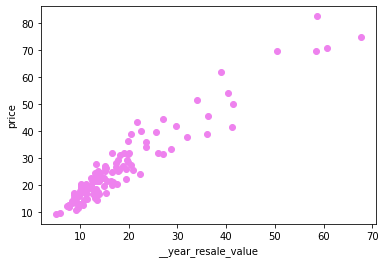

In [11]:
plt.scatter(df2.__year_resale_value,df2.Price_in_thousands,color=colors[4])
plt.xlabel('__year_resale_value')
plt.ylabel('price')
plt.show()

In [12]:
len(df2[df2[['__year_resale_value','Price_in_thousands']].isna().all(axis=1)])

0

In [13]:
d_df=df2.dropna(subset=['__year_resale_value','Price_in_thousands'])
y=d_df.__year_resale_value.values
X=d_df.Price_in_thousands.values.reshape(-1,1)

In [14]:
model1=LinearRegression()
model1.fit(X,y)
model1.score(X,y)

0.9098114540463296

In [15]:
df3=df2.copy()
d=df2[df2.__year_resale_value.isna()]
n=d.index
df3.loc[n,['__year_resale_value']]=model1.predict(d[['Price_in_thousands']])
df3.__year_resale_value.isna().sum()

0

In [16]:
m=model1.coef_
b=model1.intercept_

In [17]:
d=df3[df3.Price_in_thousands.isna()]
n=d.index
df3.loc[n,['Price_in_thousands']]=(d.__year_resale_value.values-b)/m[0]
df3.Price_in_thousands.isna().sum()

0

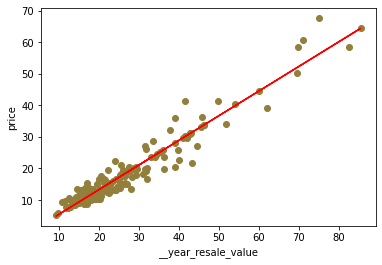

In [18]:
plt.scatter(df3.Price_in_thousands,df3.__year_resale_value,color=colors[7])
plt.plot(df3.Price_in_thousands,model1.predict(df3[['Price_in_thousands']]),color=colors[0])
plt.xlabel('__year_resale_value')
plt.ylabel('price')
plt.show()

In [19]:
df4=df3.copy()
for column in df3.columns:
    if df3[column].isnull().sum():
        df4[column]=df3[column].fillna(df3[column].mean())
        
df4.isnull().sum()

Manufacturer                 0
Model                        0
Sales_in_thousands           0
__year_resale_value          0
Vehicle_type                 0
Engine_size                  0
Horsepower                   0
Wheelbase                    0
Width                        0
Length                       0
Curb_weight                  0
Fuel_capacity                0
Fuel_efficiency              0
Power_perf_factor            0
days_after_launch(1/1/13)    0
Price_in_thousands           0
dtype: int64

##  Data Analysis & Visualisation

1. Manufacturer

In [26]:
df4['Manufacturer'].nunique()

30

In [27]:
Manf_name=df4['Manufacturer'].unique()
Manf_name

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

#### Top 10 companies with highest no of cars[models]

In [28]:
top_manf=df4['Manufacturer'].value_counts()[:5]
top_manf

Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Name: Manufacturer, dtype: int64

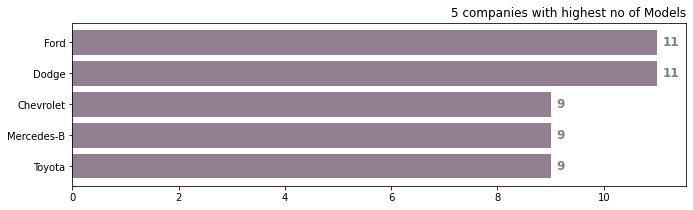

In [29]:
figu,ax=plt.subplots(figsize=(11,3))
ax.barh(top_manf.index.values,top_manf.values,color='#937f91')
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.1,i.get_y()+0.5,str(i.get_width()),fontsize=12,fontweight="bold",color="grey")
ax.set_title("5 companies with highest no of Models",loc="right")
plt.show()

Dodge and Toyota has highest no of model

2. Model

In [30]:
d=df4['Model'].value_counts()
mod=d[d>1].index.values
mod

array(['Neon'], dtype=object)

In [31]:
df4[df4.Model==mod[0]].Manufacturer

35        Dodge
114    Plymouth
Name: Manufacturer, dtype: object

Doged and Polymouth has cars of same model name as Neon

3. Sales

In [37]:
sales=df4.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending =False)
top_sales=sales
top_sales

Manufacturer
Ford          2022.635
Dodge          910.149
Toyota         740.205
Honda          592.674
Chevrolet      554.365
Nissan         399.635
Pontiac        370.534
Jeep           293.153
Buick          242.019
Mercury        237.999
Volkswagen     209.212
Chrysler       201.721
Mitsubishi     180.895
Oldsmobile     178.989
Saturn         168.850
Hyundai        137.326
Mercedes-B     117.125
Cadillac       112.178
Lexus          106.843
Lincoln         85.634
Subaru          80.135
Acura           79.005
Volvo           75.740
Plymouth        64.001
BMW             46.505
Audi            40.557
Infiniti        23.713
Saab            21.306
Jaguar          15.467
Porsche         12.128
Name: Sales_in_thousands, dtype: float64

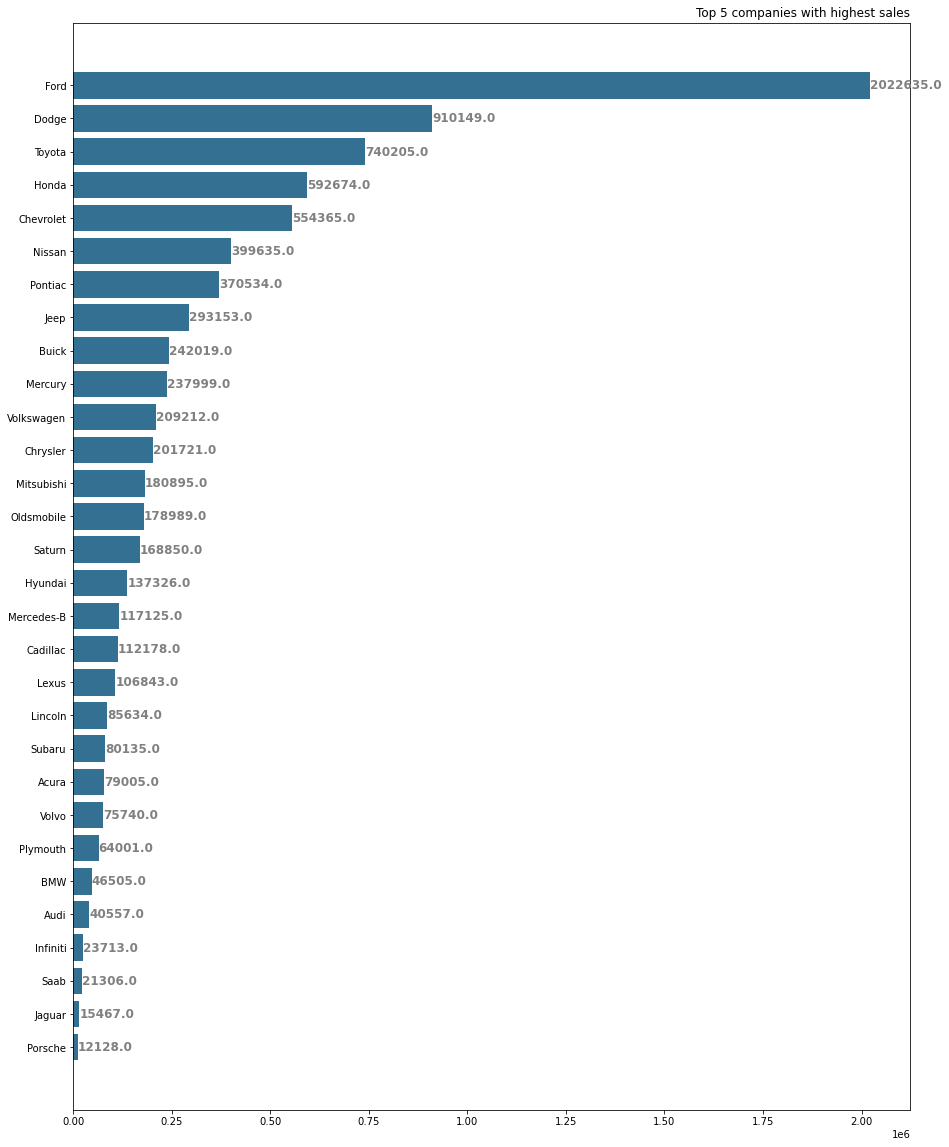

In [52]:
figu,ax=plt.subplots(figsize=(15,20))
ax.barh(sales.index.values,sales.values*1000,color='#337091')
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.1,i.get_y()+0.5,str(round(i.get_width(),2)),fontsize=12,fontweight="bold",color="grey")
ax.set_title("companies with highest sales",loc="right")
plt.show()

In [54]:
sales=df4.groupby('Manufacturer')[['Sales_in_thousands','Price_in_thousands']]
#.sum().sort_values(ascending =False)[:5]
sales

<AxesSubplot:>

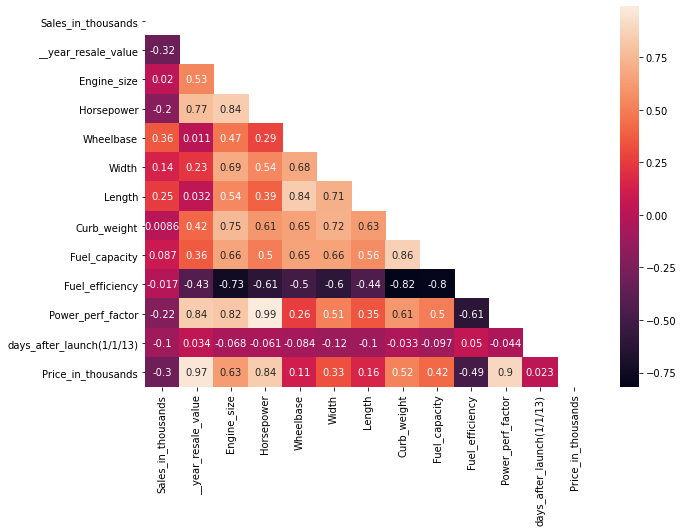

In [130]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df4.corr(), dtype=bool))
heatmap(df4.corr(),annot=True,mask=mask)